# ЛР3. Классификация с помощью дерева принятия решений.

## Задание 1.

Для каждого из подзаданий: 

1. Постройте модель классификации на основе дерева принятия решений.
2. Подберите оптимальные гиперпараметры модели используя кросс-валидацию.
3. Визуализируйте деревья для моделей.
4. Протестируйте различные метрики оценки качества разбиения (Джини, Энтропия). 
5. Сделайте выводы о точности моделей.


### 1.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла telecom.csv для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('telecom.csv')

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
data = data_raw.drop(columns=['phone number'])

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [6]:
X = data.drop('churn', axis=1)
y = data['churn']

In [7]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9370314842578711


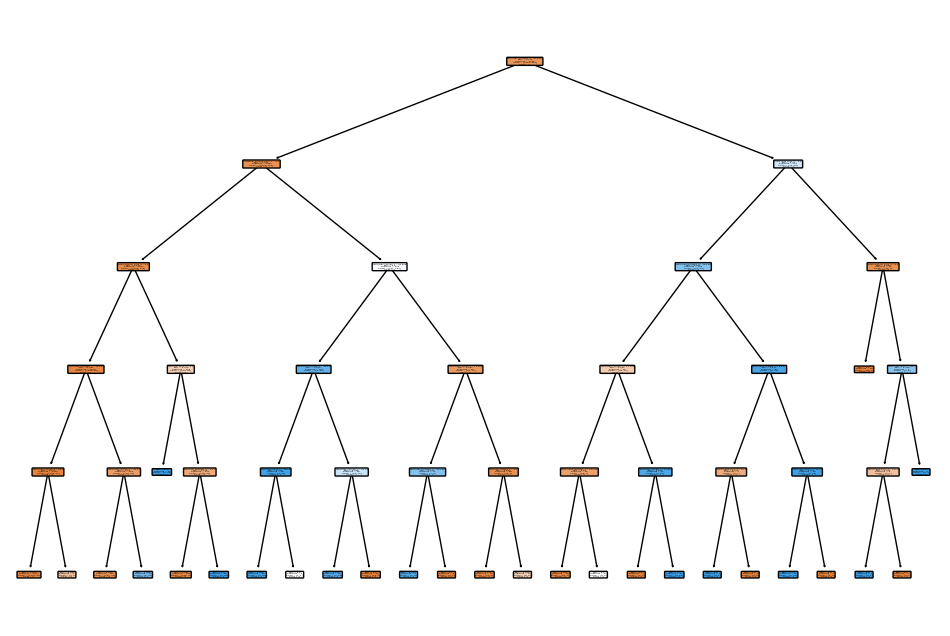

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train a new Decision Tree classifier with the best hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_dt_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

### 1.2 Классификация ириса из датасет iris. 

Предскажите вид ириса по его параметрам.

In [9]:
from sklearn import datasets

iris = datasets.load_iris()

In [10]:
X = iris.data
y = iris.target

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy: 1.0


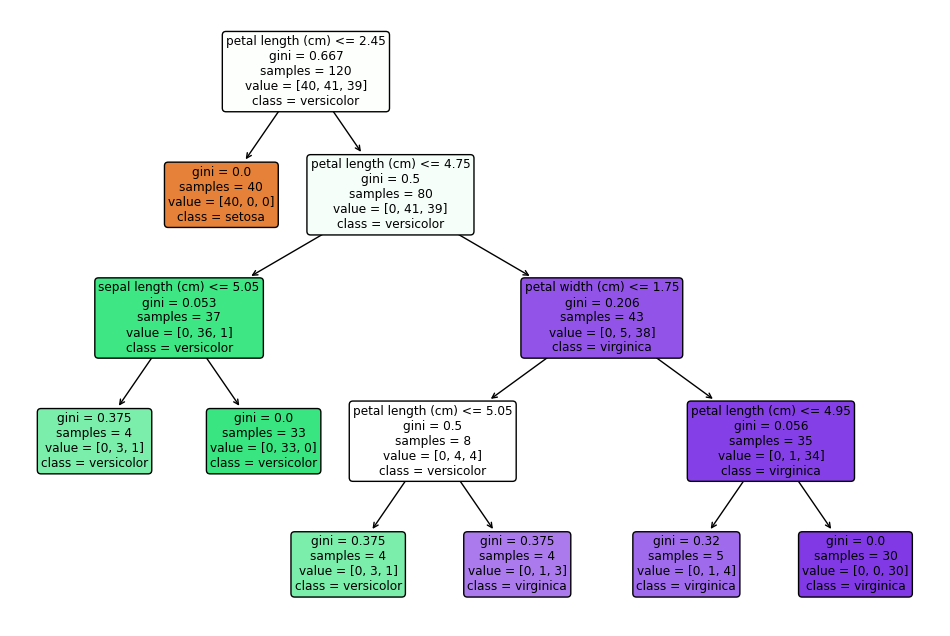

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train a new Decision Tree classifier with the best hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_dt_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

### 1.3 Предсказание диабета у пациентов.

Используйте данные из файла diabetes.csv для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

In [14]:
data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
X = data.drop(['Outcome'], axis = 1)
y = data["Outcome"]

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test Accuracy: 0.7857142857142857


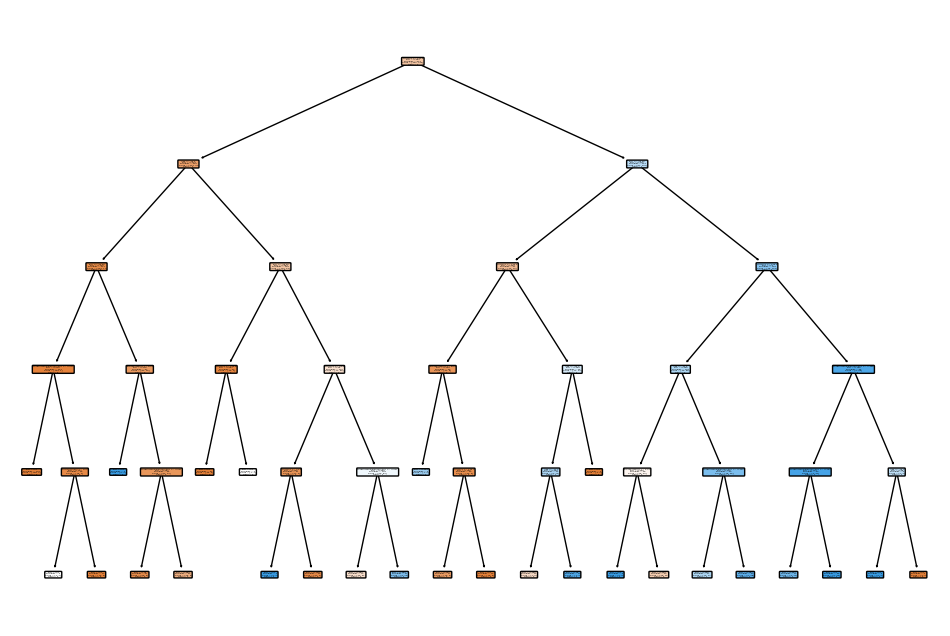

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train a new Decision Tree classifier with the best hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_dt_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

## Задание 2. 

Используя данные из файла IceCreamData.csv предскажите количественное значение дохода от продажи мороженного в зависимости от температуры воздуха.  Используйте регрессию на основе дерева принятия решений. Решите эту же задачу, испотзуя полиномиальную регрессию. Сравните качество моделей.

In [23]:
data_raw = pd.read_csv("IceCreamData.csv")
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 795.723149578769


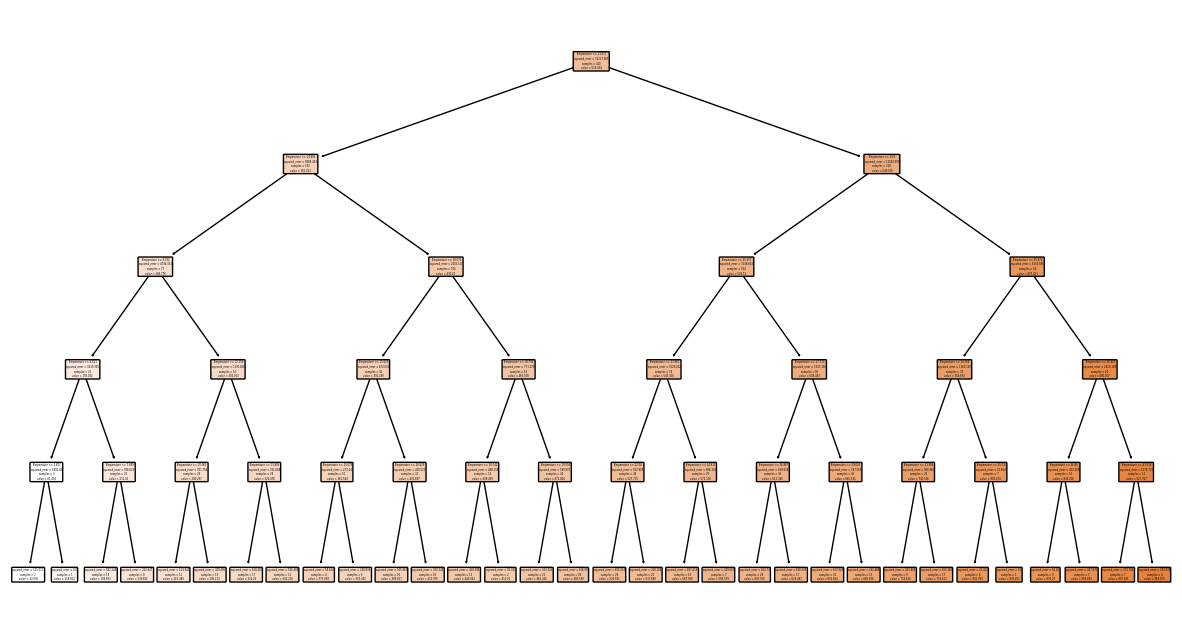

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
X = data_raw["Temperature"].to_numpy().reshape((-1,1))
y = data_raw["Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train a new Decision Tree regressor with the best hyperparameters
best_dt_regressor = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(15, 8))
plot_tree(best_dt_regressor, filled=True, feature_names=["Temperature"], rounded=True)
plt.show()

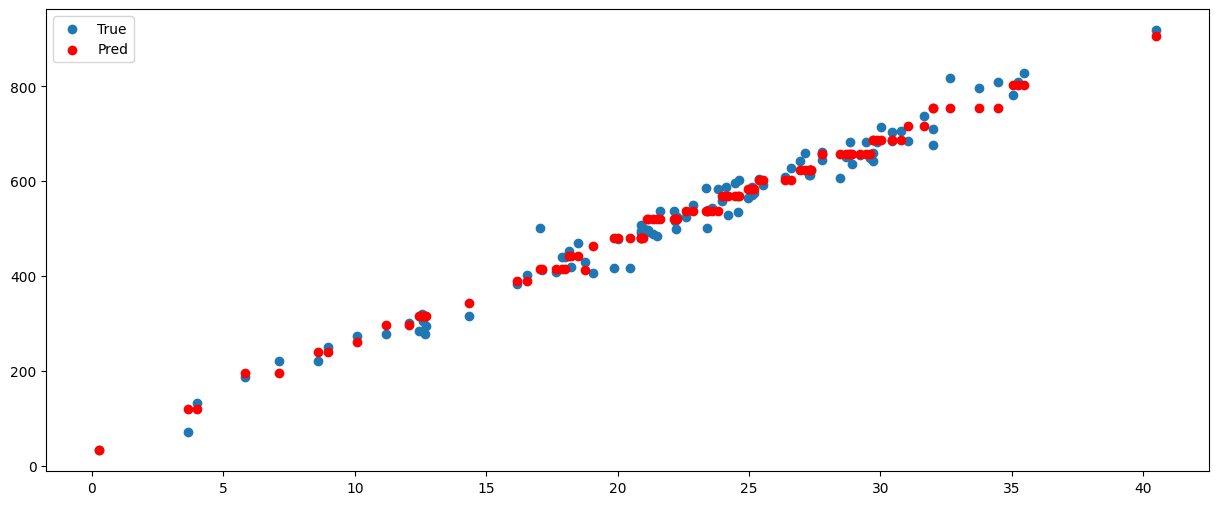

In [38]:
plt.figure(figsize=(15,6))
plt.scatter(X_test,y_test, label="True")
plt.scatter(X_test,y_pred, color='r', label="Pred")
plt.legend() 
plt.show()

## Ссылки

Классификация.  https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

Документация.   https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Регрессия.  https://www.aionlinecourse.com/tutorial/machine-learning/decision-tree-intuition